In [1]:
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()

({'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66'),
  'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7')},
 '/Users/arunabh98/.dipy/sherbrooke_3shell')

In [2]:
from os.path import expanduser, join
home = expanduser('~')

In [3]:
dname = join(home, '.dipy', 'sherbrooke_3shell')

In [4]:
fdwi = join(dname, 'HARDI193.nii.gz')

print(fdwi)

fbval = join(dname, 'HARDI193.bval')

print(fbval)

fbvec = join(dname, 'HARDI193.bvec')

print(fbvec)

/Users/arunabh98/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/Users/arunabh98/.dipy/sherbrooke_3shell/HARDI193.bval
/Users/arunabh98/.dipy/sherbrooke_3shell/HARDI193.bvec


In [5]:
from dipy.io.image import load_nifti
data, affine, img = load_nifti(fdwi, return_img=True)

In [6]:
print(data.shape)

(128, 128, 60, 193)


In [7]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


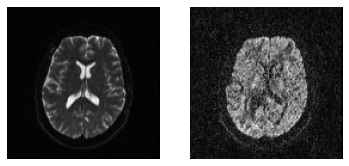

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

In [9]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [10]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

In [11]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [12]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


In [13]:
S0s = data[:, :, :, gtab.b0s_mask]

In [14]:
print(S0s.shape)

(128, 128, 60, 1)


In [15]:
from dipy.io.image import save_nifti
save_nifti('HARDI193_S0.nii.gz', S0s, affine)

In [16]:
# Enables/disables interactive visualization
interactive = False

from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti, load_nifti_data

hardi_fname, hardi_bval_fname, hardi_bvec_fname = get_fnames('stanford_hardi')
label_fname = get_fnames('stanford_labels')

data, affine, hardi_img = load_nifti(hardi_fname, return_img=True)
labels = load_nifti_data(label_fname)
bvals, bvecs = read_bvals_bvecs(hardi_bval_fname, hardi_bvec_fname)
gtab = gradient_table(bvals, bvecs)

In [17]:
white_matter = (labels == 1) | (labels == 2)

In [18]:
from dipy.reconst.csdeconv import auto_response
from dipy.reconst.shm import CsaOdfModel
from dipy.data import default_sphere
from dipy.direction import peaks_from_model

response, ratio = auto_response(gtab, data, roi_radius=10, fa_thr=0.7)
csa_model = CsaOdfModel(gtab, sh_order=6)
csa_peaks = peaks_from_model(csa_model, data, default_sphere,
                             relative_peak_threshold=.8,
                             min_separation_angle=45,
                             mask=white_matter)

In [21]:
from dipy.viz import window, actor, has_fury

if has_fury:
    ren = window.Renderer()
    ren.add(actor.peak_slicer(csa_peaks.peak_dirs,
                              csa_peaks.peak_values,
                              colors=None))

    window.record(ren, out_path='csa_direction_field.png', size=(900, 900))

    if interactive:
        window.show(ren, size=(800, 800))

/opt/anaconda3/envs/internship/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Renderer() deprecated, Please use Scene()instead

* deprecated from version: 0.2.0
* Will raise <class 'fury.deprecator.ExpiredDeprecationError'> as of version: 0.6.0
  after removing the cwd from sys.path.


In [22]:
from dipy.tracking.stopping_criterion import ThresholdStoppingCriterion

stopping_criterion = ThresholdStoppingCriterion(csa_peaks.gfa, .25)

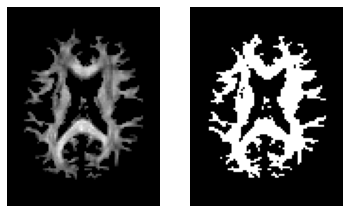

In [23]:
import matplotlib.pyplot as plt

sli = csa_peaks.gfa.shape[2] // 2
plt.figure('GFA')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(csa_peaks.gfa[:, :, sli].T, cmap='gray', origin='lower')

plt.subplot(1, 2, 2).set_axis_off()
plt.imshow((csa_peaks.gfa[:, :, sli] > 0.25).T, cmap='gray', origin='lower')

plt.savefig('gfa_tracking_mask.png')

In [24]:
from dipy.tracking import utils

seed_mask = (labels == 2)
seeds = utils.seeds_from_mask(seed_mask, affine, density=[2, 2, 2])

In [25]:
from dipy.tracking.local_tracking import LocalTracking
from dipy.tracking.streamline import Streamlines

# Initialization of LocalTracking. The computation happens in the next step.
streamlines_generator = LocalTracking(csa_peaks, stopping_criterion, seeds,
                                      affine=affine, step_size=.5)
# Generate streamlines object
streamlines = Streamlines(streamlines_generator)

In [26]:
from dipy.viz import colormap

if has_fury:
    # Prepare the display objects.
    color = colormap.line_colors(streamlines)

    streamlines_actor = actor.line(streamlines,
                                   colormap.line_colors(streamlines))

    # Create the 3D display.
    r = window.Renderer()
    r.add(streamlines_actor)

    # Save still images for this static example. Or for interactivity use
    window.record(r, out_path='tractogram_EuDX.png', size=(800, 800))
    if interactive:
        window.show(r)

/opt/anaconda3/envs/internship/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Renderer() deprecated, Please use Scene()instead

* deprecated from version: 0.2.0
* Will raise <class 'fury.deprecator.ExpiredDeprecationError'> as of version: 0.6.0
  # This is added back by InteractiveShellApp.init_path()


In [27]:
from dipy.io.stateful_tractogram import Space, StatefulTractogram
from dipy.io.streamline import save_trk

sft = StatefulTractogram(streamlines, hardi_img, Space.RASMM)
save_trk(sft, "tractogram_EuDX.trk", streamlines)

In [28]:
import pyvista as pv

In [29]:
cyl = pv.Cylinder()
arrow = pv.Arrow()
sphere = pv.Sphere()
plane = pv.Plane()
line = pv.Line()
box = pv.Box()
cone = pv.Cone()
poly = pv.Polygon()
disc = pv.Disc()

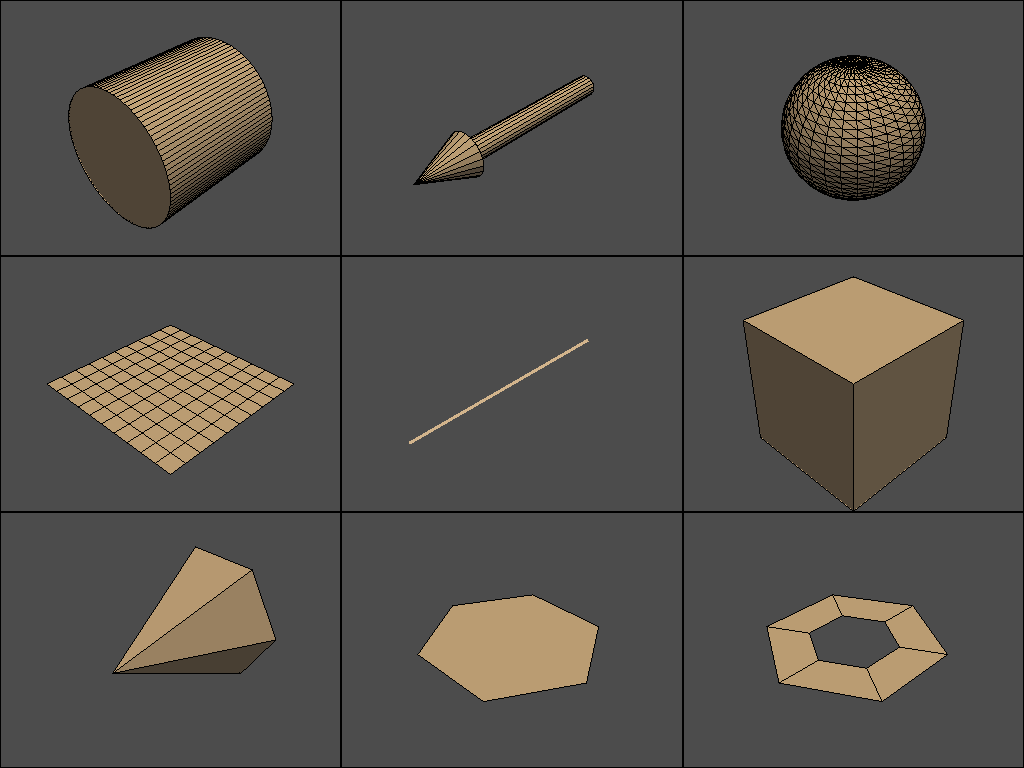

In [30]:
p = pv.Plotter(shape=(3, 3))
# Top row
p.subplot(0, 0)
p.add_mesh(cyl, color="tan", show_edges=True)
p.subplot(0, 1)
p.add_mesh(arrow, color="tan", show_edges=True)
p.subplot(0, 2)
p.add_mesh(sphere, color="tan", show_edges=True)
# Middle row
p.subplot(1, 0)
p.add_mesh(plane, color="tan", show_edges=True)
p.subplot(1, 1)
p.add_mesh(line, color="tan", line_width=3)
p.subplot(1, 2)
p.add_mesh(box, color="tan", show_edges=True)
# Bottom row
p.subplot(2, 0)
p.add_mesh(cone, color="tan", show_edges=True)
p.subplot(2, 1)
p.add_mesh(poly, color="tan", show_edges=True)
p.subplot(2, 2)
p.add_mesh(disc, color="tan", show_edges=True)
# Render all of them
p.show()

In [33]:
IPython --gui=qt

SyntaxError: can't assign to operator (<ipython-input-33-13b7b094b252>, line 1)

In [34]:
import napari
from skimage.data import astronaut

# create the viewer and display the image
viewer = napari.view_image(astronaut(), rgb=True)


RuntimeError: napari requires a Qt event loop to run. To create one, try one of the following: 
  - use the `napari.gui_qt()` context manager. See https://github.com/napari/napari/tree/master/examples for usage examples.
  - In IPython or a local Jupyter instance, use the `%gui qt` magic command.
  - Launch IPython with the option `--gui=qt`.
  - (recommended) in your IPython configuration file, add or uncomment the line `c.TerminalIPythonApp.gui = 'qt'`. Then, restart IPython.

In [1]:
from skimage import data
import napari

with napari.gui_qt():
    viewer = napari.view_image(data.astronaut(), rgb=True)

In [3]:
from skimage import data
import napari

with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(data.astronaut(), rgb=True)

In [4]:
from skimage import data
import napari

with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(data.astronaut(), name='astronaut')
    viewer.add_image(data.moon(), name='moon')
    viewer.add_image(data.camera(), name='camera')

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [7]:
from skimage import data
import napari
import numpy as np

with napari.gui_qt():
    viewer = napari.view_image(data.astronaut(), rgb=True)
    points = np.array([[100, 100], [200, 200], [300, 100]])
    viewer.add_points(points, size=30)

In [9]:
import numpy as np
from skimage import data
import napari

with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(data.moon(), name='moon')
    blobs = np.stack(
        [
            data.binary_blobs(
                length=512, blob_size_fraction=0.05, n_dim=2, volume_fraction=f
            )
            for f in np.linspace(0.05, 0.5, 10)
        ],
        axis=0,
    ).astype(float)
    viewer.add_image(blobs, name='blobs', opacity=0.5, colormap='red')

In [ ]:
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square, remove_small_objects
import napari


coins = data.coins()[50:-50, 50:-50]
# apply threshold
thresh = threshold_otsu(coins)
bw = closing(coins > thresh, square(4))
# remove artifacts connected to image border
cleared = remove_small_objects(clear_border(bw), 20)
# label image regions
label_image = label(cleared)

with napari.gui_qt():
    # create the viewer and add the coins image
    viewer = napari.view_image(coins, name='coins')
    # add the labels
    viewer.add_labels(label_image, name='segmentation')